In [0]:
import pandas as pd
import re
phones = pd.read_csv("https://raw.githubusercontent.com/Alecsandros/Smartphones/dataset/phone_dataset.csv")

In [0]:
### DELETANDO COLUNAS NÃO DESEJADAS E RENOMEANDO

#Desnecessários
phones = phones.drop("2G_bands", axis=1) 
phones = phones.drop("status", axis=1)
phones = phones.drop("weight_oz", axis=1)
phones = phones.drop("colors", axis=1)
phones = phones.drop("radio", axis=1)
phones = phones.drop("SIM", axis=1)

#Faltantes
phones = phones.drop("network_speed", axis=1) 
phones = phones.drop("GPU", axis=1)
phones = phones.drop("NFC", axis=1)
phones = phones.drop("USB", axis=1)

#Outros
phones = phones.drop("RAM", axis=1)

phones = phones.rename(columns={'4G_bands': '4G', '3G_bands': '3G', 'network_technology': 'network', 'weight_g': 'weight', 'loud_speaker': 'speaker', 'WLAN': 'WIFI'})

In [0]:
##3 RESOLUTION E PPI

#Separando display size em resolution e ppi:
#Transforma display_size em string e divide ele por uma expressão
phones['display_size'] = phones['display_size'].astype('str')
displayInfo = phones["display_size"].str.split("\(~", n = 1, expand = True) 

#Agora atribui cada um a sua coluna
phones['display_size'] = displayInfo[0]
phones['ppi'] = displayInfo[1]

#Tratando missing values
phones['display_size'] = phones['display_size'].apply(lambda x: 'missing' if 'nan' in str(x) else x)

#Renomeando display_size para resolution
phones['display_size'] = phones['display_size'].astype('category')
phones = phones.rename(columns={'display_size': 'resolution'})

#Convertendo ppi para float
phones['ppi'] = phones['ppi'].str.extract(r'([0-9]*)') 
phones['ppi'] = pd.to_numeric(phones['ppi'], errors='coerce')
phones['ppi'] = phones['ppi'].astype('float64')

In [0]:
### 4G, 3G E NETWORK

#Regex da bibioteca re importada no início
regexp = re.compile('[A-Z]')

#Transformando colunas em booleanas
phones['4G'] = phones['4G'].apply(lambda x: True if 'LTE' in str(x) else False)
phones['3G'] = phones['3G'].apply(lambda x: True if regexp.search(str(x)) else False)
phones['network'] = phones['network'].apply(lambda x: False if 'No cellular connectivity' in str(x) else True)

In [0]:
### ANNOUNCED

phones['announced'] = phones['announced'].str.extract(r'([1-3][0-9]{3})')
phones['announced'] = phones['announced'].apply(lambda x: 'missing' if 'nan' in str(x) else x)
phones['announced'] = phones['announced'].astype('category')

In [0]:
### GPRS

phones['GPRS'] = phones['GPRS'].apply(lambda x: False if 'No' in str(x) else ('missing' if 'nan' in str(x) else True))

In [0]:
### EDGE

phones['EDGE'] = phones['EDGE'].apply(lambda x: False if 'No' in str(x) else ('missing' if 'nan' in str(x) else True))

In [0]:
### DIMENTIONS (depth)

phones['dimentions'] = phones['dimentions'].astype('str')

#Extrai depth a partir de dimentions
phones['depth'] = phones['dimentions'].str.extract(r'([0-9]*[.]*[0-9]* mm)') 

#Restringe apenas para número
phones["depth"] = phones["depth"].str.extract(r'([0-9]*[.]*[0-9]*)')
phones["depth"] = pd.to_numeric(phones["depth"], errors='coerce')

#Converte a coluna para float
phones['depth'] = phones['depth'].astype('float64')

In [0]:
### DIMENTIONS (width, height)

phones['dimentions'] = phones['dimentions'].astype('str')

#dimentions agora contém a substring responsável por width e height
phones['dimentions'] =  phones['dimentions'].str.extract(r'([0-9]*[.]*[0-9]* x *[0-9]*[.]*[0-9]*)') 
  
#divide as dimensões em 2
width_height = phones['dimentions'].str.split("x", n = 1, expand = True) 

#Atribui as dimensões para cada coluna
phones['width'] = width_height[0]
phones['height'] = width_height[1]

#Converte as colunas para float
phones["width"] = pd.to_numeric(phones["width"], errors='coerce')
phones["height"] = pd.to_numeric(phones["height"], errors='coerce')
phones['width'] = phones['width'].astype('float64')
phones['height'] = phones['height'].astype('float64')

phones = phones.drop("dimentions", axis=1)

In [0]:
### WEIGHT

phones["weight"] = pd.to_numeric(phones["weight"], errors='coerce')
phones['weight'] = phones['weight'].astype('float64') 

In [0]:
### BODY_RATIO

#phones['body_ratio'] agora contém a substring de display_resolution responsável pelo screen to body ratio
phones['body_ratio'] = phones['display_resolution'].str.extract(r'(~[0-9]*[.]*[0-9]*)') 
phones['body_ratio'] = phones["body_ratio"].str.replace('~', '')

#Converte a coluna para float
phones['body_ratio'] = phones['body_ratio'].astype('float64')

In [0]:
### DISPLAY TYPE

## Pegando as cores do display pelo regex
phones['display_colors'] = phones['display_type'].str.extract(r'([0-9][0-9]*[M|K][ ]*colors)') 

#Pegando o tipo do display pelo regex
phones['display_type'] = phones['display_type'].str.extract(r'([A-Z][A-Z][A-Z]*[ ][A-Z]*[ ]*[A-Z]*)') 

In [0]:
### DISPLAY SIZE (ex resolution)

phones['display_resolution'] =   phones['display_resolution'].str.extract(r'([0-9]*[.]*[0-9]* inches)') 
phones['display_resolution'] = phones["display_resolution"].str.replace('inches', '')

#Converte a coluna para float
phones['display_resolution'] = phones['display_resolution'].astype('float64')

#Corrigindo os nomes errados
phones = phones.rename(columns={'display_resolution': 'display_size', 'resolution': 'display_resolution'}) 

In [0]:
### OS (NAME E VERSION)

phones['OS_version'] = phones['OS'].str.extract(r'(([0-9][.]*)+)')[0] 
phones['OS'] = phones['OS'].str.extract(r'(([A-z]*[ ]*)+)')[0] 

phones = phones.rename(columns={'OS': 'OS_name'})

#Tratando missing values
phones['OS_version'] = phones['OS_version'].apply(lambda x: 'missing' if 'nan' in str(x) else x)
phones['OS_name'] = phones['OS_name'].apply(lambda x: 'missing' if 'nan' in str(x) else x)

phones['OS_version'] = phones['OS_version'].astype('category') #Ver coisas de 1 != 1.0 etc
phones['OS_name'] = phones['OS_name'].astype('category')  #Ver coisas de android != android etc

In [0]:
### CHIPSET

phones['Chipset'] = phones['Chipset'].apply(lambda x: 'missing' if 'nan' in str(x) else x)

In [0]:
### SD 

#Agora é bool
phones['memory_card'] = phones['memory_card'].apply(lambda x: False if 'No' in str(x) else True)

In [0]:
### INTERNAL MEMORY

phones['internal_memory'] = phones["internal_memory"].str.replace( "((\()[ -~]*)" , "", regex=True)

#IM_MB = Internal Memory in MB - Todos os dados que tem MB no regex estão como True nessa coluna, caso ele não tenha MB ele vai ficar falso.
regexp = re.compile('([0-9]+[ -~]*(MB|KB))')
phones['IM_LT_1GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

#Tirando tudo que não tem GB de internal memory
phones['internal_memory'] = phones["internal_memory"].str.replace( "([0-9]+[ -~]*(MB))" , "", regex=True)
phones['internal_memory'] = phones['internal_memory'].str.extract(r'([ -~]*(GB)[ -~]*)') 

#Coluna para todos os phones acima de 120GB
regexp = re.compile('([1-9][0-9][0-9])')
phones['IM_MT_120GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

#Removendo todos os valores acima de 100gb
phones['internal_memory'] = phones["internal_memory"].str.replace( "([0-9][0-9][0-9])" , "", regex=True)

#Coluna para todos os phones com 64GB de memória interna
regexp = re.compile('(64)')
phones['IM_64GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

#Removendo todos os valores de 64GB de memória interna
phones['internal_memory'] = phones["internal_memory"].str.replace( "64" , "", regex=True)

#Coluna para todos os phones com 32GB de memória interna
regexp = re.compile('(32)')
phones['IM_32GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

#Removendo todos os valores de 32GB de memória interna
phones['internal_memory'] = phones["internal_memory"].str.replace( "32" , "", regex=True)

#Coluna para todos os phones com 16GB de memória interna
regexp = re.compile('(16)')
phones['IM_16GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

#Removendo todos os valores de 16GB de memória interna
phones['internal_memory'] = phones["internal_memory"].str.replace( "16" , "", regex=True)

#Coluna para todos os phones entre 1GB e 15GB de memória interna
regexp = re.compile('([0-1]*[0-9])')
phones['IM_1GB_15GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)

phones = phones.drop("internal_memory", axis=1)

In [0]:
### RAM 

#RAM_MB = RAM in MB - Todos os dados que tem MB no regex estão como True nessa coluna, caso ele não tenha MB ele vai ficar falso.
#regexp = re.compile('([0-9]+[ -~]*(MB|KB))')
#phones['IM_LT_1GB'] = phones['internal_memory'].apply(lambda x: True if regexp.search(str(x)) else False)


In [0]:
### PRIMARY & SECONDARY CAMERA

phones['primary_camera'] = phones['primary_camera'].apply(lambda x: 0.3 if 'VGA' in str(x) else x)
phones['primary_camera'] = phones['primary_camera'].str.extract(r'([0-9]+(.)?[0-9]*)')
phones['primary_camera'] = phones['primary_camera'].apply(lambda x: 'missing' if 'nan' in str(x) else x)
phones['primary_camera'] = phones['primary_camera'].astype('category')


phones['secondary_camera'] = phones['secondary_camera'].apply(lambda x: 0.3 if 'VGA' in str(x) else x)
phones['secondary_camera'] = phones['secondary_camera'].str.extract(r'([0-9]+(.)?[0-9]*)')
phones['secondary_camera'] = phones['secondary_camera'].apply(lambda x: 'missing' if 'nan' in str(x) else x)
phones['secondary_camera'] = phones['secondary_camera'].astype('category')

In [0]:
### SPEAKER 

regexp = re.compile('(([S|s]tereo)|(dual))')
phones['stereo_speaker'] = phones['speaker'].apply(lambda x: True if regexp.search(str(x)) else False)

phones['speaker'] = phones['speaker'].apply(lambda x: True if 'Yes' in str(x) else False)

In [0]:
### AUDIO JACK

phones['audio_jack'] = phones['audio_jack'].apply(lambda x: True if 'Yes' in str(x) else ('missing' if 'nan' in str(x) else False))

In [0]:
### WIFI

regexp = re.compile('((No)|(no))')
phones['WIFI'] = phones['WIFI'].apply(lambda x: False if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else True))

In [0]:
### BLUETOOTH

phones['bluetooth'] = phones['bluetooth'].str.extract(r'(([Y|y]es)|([N|n]o)|([0-9].[0-9]))')

phones['bluetooth'] = phones['bluetooth'].apply(lambda x: 'missing' if 'nan' in str(x) else x)

phones['bluetooth'] = phones['bluetooth'].astype('category')

In [0]:
### GPS

phones['GPS'] = phones['GPS'].apply(lambda x: True if 'Yes' in str(x) else (True if 'GPS' in str(x) else ('missing' if 'nan' in str(x) else False)))

In [0]:
### BATTERY

phones['battery'] = phones['battery'].str.extract(r'([0-9]+[ ]mAh)') 
phones['battery'] = phones['battery'].str.extract(r'([0-9]+)') 

phones['battery'] = pd.to_numeric(phones['battery'], errors='coerce')
phones['battery'] = phones['battery'].astype('float64')

In [0]:
### SENSORS

#accelerometer
regexp = re.compile('([A|a]ccelerometer)')
phones['accelerometer'] = phones['sensors'].apply(lambda x: True if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else False))

#proximity
regexp = re.compile('([p|P]roximity)')
phones['proximity'] = phones['sensors'].apply(lambda x: True if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else False))

#compass
regexp = re.compile('([c|C]ompass)')
phones['compass'] = phones['sensors'].apply(lambda x: True if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else False))

#gyro
regexp = re.compile('([g|G]yro)')
phones['gyro'] = phones['sensors'].apply(lambda x: True if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else False))

#fingerprint
regexp = re.compile('([f|F]ingerprint)')
phones['fingerprint'] = phones['sensors'].apply(lambda x: True if regexp.search(str(x)) else ('missing' if 'nan' in str(x) else False))

phones = phones.drop("sensors", axis=1)

In [29]:
phones.head()

,brand,model,network,3G,4G,GPRS,EDGE,announced,weight,display_type,...,IM_64GB,IM_32GB,IM_16GB,IM_1GB_15GB,stereo_speaker,accelerometer,proximity,compass,gyro,fingerprint
0,Acer,Iconia Talk S,True,True,True,True,True,2016,260.0,IPS LCD,...,False,True,True,False,False,True,True,False,False,False
1,Acer,Liquid Z6 Plus,True,True,True,True,True,2016,169.0,IPS LCD,...,False,True,False,False,False,True,True,False,False,True
2,Acer,Liquid Z6,True,True,True,True,True,2016,NaN,IPS LCD,...,False,False,False,True,False,True,True,False,False,False
3,Acer,Iconia Tab 10 A3-A40,False,False,False,False,False,2016,NaN,IPS LCD,...,True,True,True,False,True,True,False,False,False,False
4,Acer,Liquid X2,True,True,True,True,True,2015,166.0,IPS LCD,...,False,True,False,False,False,True,True,True,False,False


**KNN**

In [0]:
phones = phones.drop("Unnamed: 40", axis=1)

In [0]:
#Passando os dados para category

phones['brand'] = phones['brand'].astype('category')
phones['model'] = phones['model'].astype('category')
phones['network'] = phones['network'].astype('category')
phones['3G'] = phones['3G'].astype('category')
phones['4G'] = phones['4G'].astype('category')
phones['GPRS'] = phones['GPRS'].astype('category')
phones['EDGE'] = phones['EDGE'].astype('category')
phones['announced'] = phones['announced'].astype('category')
phones['display_type'] = phones['display_type'].astype('category')
phones['display_resolution'] = phones['display_resolution'].astype('category')
phones['OS_name'] = phones['OS_name'].astype('category')
phones['CPU'] = phones['CPU'].astype('category')
phones['Chipset'] = phones['Chipset'].astype('category')
phones['memory_card'] = phones['memory_card'].astype('category')
phones['primary_camera'] = phones['primary_camera'].astype('category')
phones['secondary_camera'] = phones['secondary_camera'].astype('category')
phones['speaker'] = phones['speaker'].astype('category')
phones['audio_jack'] = phones['audio_jack'].astype('category')
phones['WIFI'] = phones['WIFI'].astype('category')
phones['bluetooth'] = phones['bluetooth'].astype('category')
phones['GPS'] = phones['GPS'].astype('category')
phones['img_url'] = phones['img_url'].astype('category')
phones['display_colors'] = phones['display_colors'].astype('category')
phones['OS_version'] = phones['OS_version'].astype('category')
phones['IM_LT_1GB'] = phones['IM_LT_1GB'].astype('category')
phones['IM_MT_120GB'] = phones['IM_MT_120GB'].astype('category')
phones['IM_64GB'] = phones['IM_64GB'].astype('category')
phones['IM_32GB'] = phones['IM_32GB'].astype('category')
phones['IM_16GB'] = phones['IM_16GB'].astype('category')
phones['IM_1GB_15GB'] = phones['IM_1GB_15GB'].astype('category')
phones['stereo_speaker'] = phones['stereo_speaker'].astype('category')
phones['accelerometer'] = phones['accelerometer'].astype('category')
phones['proximity'] = phones['proximity'].astype('category')
phones['compass'] = phones['compass'].astype('category')
phones['gyro'] = phones['gyro'].astype('category')
phones['fingerprint'] = phones['fingerprint'].astype('category')

In [0]:
#Criando uma cópia do dataframe para fazer o KNN para os missing values
phones_knn = phones.copy(deep=True)

In [33]:
phones.isnull().sum()

brand                    0
model                    0
network                  0
3G                       0
4G                       0
GPRS                     0
EDGE                     0
announced                0
weight                 953
display_type          1119
display_size          1233
display_resolution       0
OS_name                  0
CPU                   3794
Chipset                  0
memory_card              0
primary_camera           0
secondary_camera         0
speaker                  0
audio_jack               0
WIFI                     0
bluetooth                0
GPS                      0
battery                961
approx_price_EUR      3625
img_url                  0
ppi                   1313
depth                  360
width                  385
height                 383
body_ratio            1576
display_colors        1472
OS_version               0
IM_LT_1GB                0
IM_MT_120GB              0
IM_64GB                  0
IM_32GB                  0
I

In [0]:
#Passando os dados para category

phones_knn['brand'] = phones_knn['brand'].cat.codes
phones_knn['model'] = phones_knn['model'].cat.codes
phones_knn['network'] = phones_knn['network'].cat.codes
phones_knn['3G'] = phones_knn['3G'].cat.codes
phones_knn['4G'] = phones_knn['4G'].cat.codes
phones_knn['GPRS'] = phones_knn['GPRS'].cat.codes
phones_knn['EDGE'] = phones_knn['EDGE'].cat.codes
phones_knn['announced'] = phones_knn['announced'].cat.codes
phones_knn['display_type'] = phones_knn['display_type'].cat.codes
phones_knn['display_resolution'] = phones_knn['display_resolution'].cat.codes
phones_knn['OS_name'] = phones_knn['OS_name'].cat.codes
phones_knn['CPU'] = phones_knn['CPU'].cat.codes
phones_knn['Chipset'] = phones_knn['Chipset'].cat.codes
phones_knn['memory_card'] = phones_knn['memory_card'].cat.codes
phones_knn['primary_camera'] = phones_knn['primary_camera'].cat.codes
phones_knn['secondary_camera'] = phones_knn['secondary_camera'].cat.codes
phones_knn['speaker'] = phones_knn['speaker'].cat.codes
phones_knn['audio_jack'] = phones_knn['audio_jack'].cat.codes
phones_knn['WIFI'] = phones_knn['WIFI'].cat.codes
phones_knn['bluetooth'] = phones_knn['bluetooth'].cat.codes
phones_knn['GPS'] = phones_knn['GPS'].cat.codes
phones_knn['img_url'] = phones_knn['img_url'].cat.codes
phones_knn['display_colors'] = phones_knn['display_colors'].cat.codes
phones_knn['OS_version'] = phones_knn['OS_version'].cat.codes
phones_knn['IM_LT_1GB'] = phones_knn['IM_LT_1GB'].cat.codes
phones_knn['IM_MT_120GB'] = phones_knn['IM_MT_120GB'].cat.codes
phones_knn['IM_64GB'] = phones_knn['IM_64GB'].cat.codes
phones_knn['IM_32GB'] = phones_knn['IM_32GB'].cat.codes
phones_knn['IM_16GB'] = phones_knn['IM_16GB'].cat.codes
phones_knn['IM_1GB_15GB'] = phones_knn['IM_1GB_15GB'].cat.codes
phones_knn['stereo_speaker'] = phones_knn['stereo_speaker'].cat.codes
phones_knn['accelerometer'] = phones_knn['accelerometer'].cat.codes
phones_knn['proximity'] = phones_knn['proximity'].cat.codes
phones_knn['compass'] = phones_knn['compass'].cat.codes
phones_knn['gyro'] = phones_knn['gyro'].cat.codes
phones_knn['fingerprint'] = phones_knn['fingerprint'].cat.codes

In [35]:
from fancyimpute import KNN
phones_knn_aux = KNN(k=5).fit_transform(phones_knn)

Using TensorFlow backend.


Imputing row 1/8629 with 0 missing, elapsed time: 24.834
Imputing row 101/8629 with 2 missing, elapsed time: 24.837
Imputing row 201/8629 with 0 missing, elapsed time: 24.842
Imputing row 301/8629 with 1 missing, elapsed time: 24.848
Imputing row 401/8629 with 1 missing, elapsed time: 24.858
Imputing row 501/8629 with 0 missing, elapsed time: 24.876
Imputing row 601/8629 with 2 missing, elapsed time: 24.881
Imputing row 701/8629 with 1 missing, elapsed time: 24.889
Imputing row 801/8629 with 1 missing, elapsed time: 24.893
Imputing row 901/8629 with 1 missing, elapsed time: 24.901
Imputing row 1001/8629 with 5 missing, elapsed time: 24.918
Imputing row 1101/8629 with 1 missing, elapsed time: 24.926
Imputing row 1201/8629 with 0 missing, elapsed time: 24.936
Imputing row 1301/8629 with 1 missing, elapsed time: 24.938
Imputing row 1401/8629 with 0 missing, elapsed time: 24.948
Imputing row 1501/8629 with 0 missing, elapsed time: 24.966
Imputing row 1601/8629 with 5 missing, elapsed time:

In [36]:
phones.dtypes

brand                 category
model                 category
network               category
3G                    category
4G                    category
GPRS                  category
EDGE                  category
announced             category
weight                 float64
display_type          category
display_size           float64
display_resolution    category
OS_name               category
CPU                   category
Chipset               category
memory_card           category
primary_camera        category
secondary_camera      category
speaker               category
audio_jack            category
WIFI                  category
bluetooth             category
GPS                   category
battery                float64
approx_price_EUR       float64
img_url               category
ppi                    float64
depth                  float64
width                  float64
height                 float64
body_ratio             float64
display_colors        category
OS_versi

In [0]:
phones_knn_applied = pd.DataFrame(data=phones_knn_aux[0:,0:],columns=['brand',	'model',	'network',	'3G',	'4G',	'GPRS', 'EDGE', 'announced', 'weight', 'display_type', 'display_size', 'display_resolution' ,'OS_name', 'CPU', 'Chipset', 'memory_card', 'primary_camera', 'secondary_camera', 'speaker', 'audio_jack', 'WIFI', 'bluetooth', 'GPS', 'battery', 'approx_price_EUR', 'img_url', 'ppi', 'depth', 'width', 'height', 'body_ratio', 'display_colors', 'OS_version', 'IM_LT_1GB', 'IM_MT_120GB', 'IM_64GB', 'IM_32GB', 'IM_16GB', 'IM_1GB_15GB', 'stereo_speaker', 'accelerometer', 'proximity', 'compass', 'gyro', 'fingerprint'])

In [0]:
phones['weight'] = phones_knn_applied['weight']
phones['display_size'] = phones_knn_applied['display_size']
phones['battery'] = phones_knn_applied['battery']
phones['approx_price_EUR'] = phones_knn_applied['approx_price_EUR']
phones['ppi'] = phones_knn_applied['ppi']
phones['depth'] = phones_knn_applied['depth']
phones['width'] = phones_knn_applied['width']
phones['height'] = phones_knn_applied['height']
phones['body_ratio'] = phones_knn_applied['body_ratio']

In [40]:
phones.head()

,brand,model,network,3G,4G,GPRS,EDGE,announced,weight,display_type,...,IM_64GB,IM_32GB,IM_16GB,IM_1GB_15GB,stereo_speaker,accelerometer,proximity,compass,gyro,fingerprint
0,Acer,Iconia Talk S,True,True,True,True,True,2016,260.000000,IPS LCD,...,False,True,True,False,False,True,True,False,False,False
1,Acer,Liquid Z6 Plus,True,True,True,True,True,2016,169.000000,IPS LCD,...,False,True,False,False,False,True,True,False,False,True
2,Acer,Liquid Z6,True,True,True,True,True,2016,136.200166,IPS LCD,...,False,False,False,True,False,True,True,False,False,False
3,Acer,Iconia Tab 10 A3-A40,False,False,False,False,False,2016,578.878977,IPS LCD,...,True,True,True,False,True,True,False,False,False,False
4,Acer,Liquid X2,True,True,True,True,True,2015,166.000000,IPS LCD,...,False,True,False,False,False,True,True,True,False,False


**Plotando Gráficos**

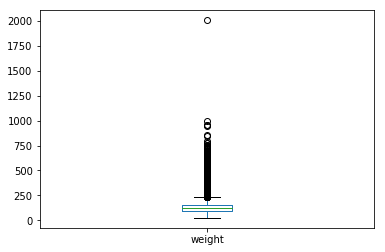

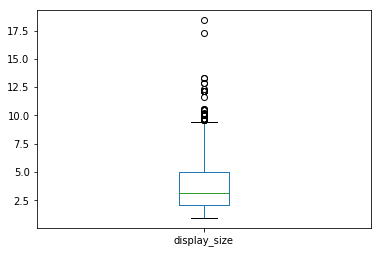

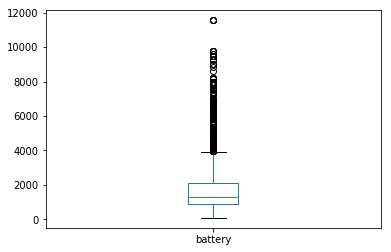

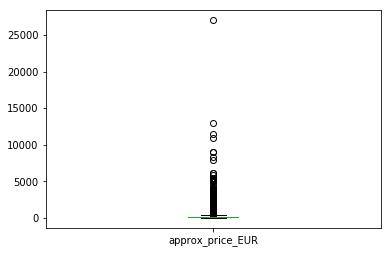

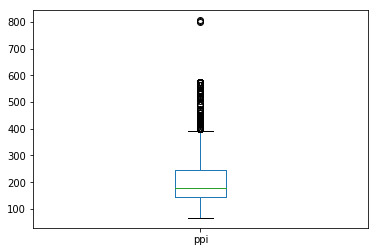

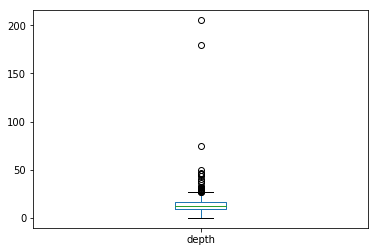

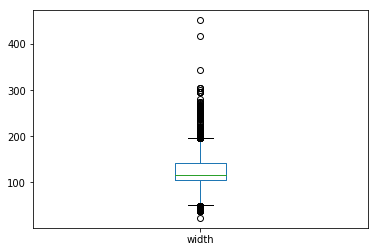

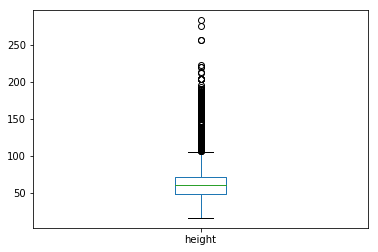

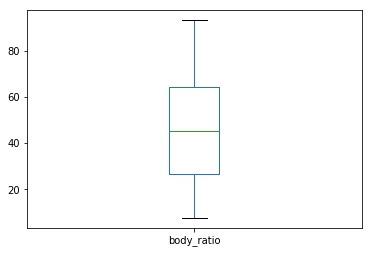

In [41]:
phones[['weight']].plot(kind='box')
phones[['display_size']].plot(kind='box')
phones[['battery']].plot(kind='box')
phones[['approx_price_EUR']].plot(kind='box')
phones[['ppi']].plot(kind='box')
phones[['depth']].plot(kind='box')
phones[['width']].plot(kind='box')
phones[['height']].plot(kind='box')
phones[['body_ratio']].plot(kind='box')

**Separar Tablet, Smartphone e Dumbphone**

In [0]:
phones['type'] = phones['display_size'].apply(lambda x: 'Tablet' if x >= 6.4 else ('Phone' if x < 4.0 else 'Smartphone'))

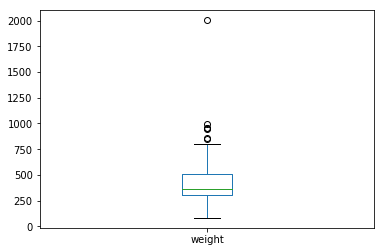

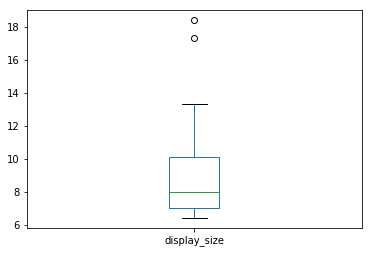

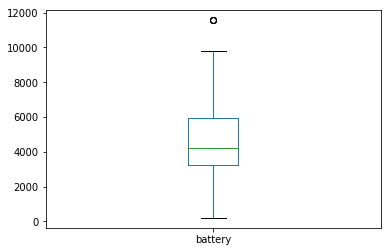

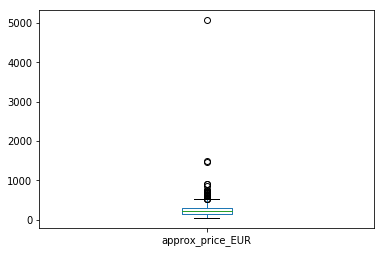

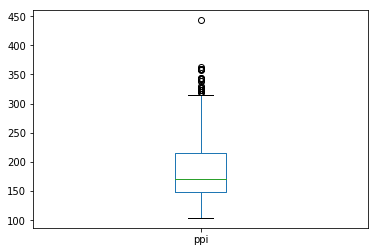

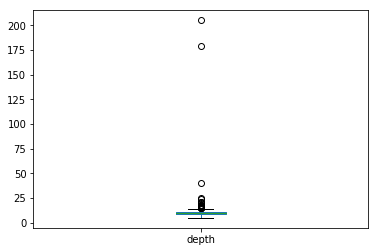

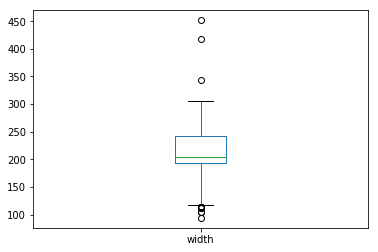

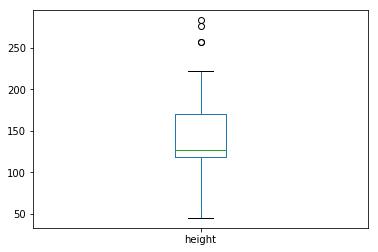

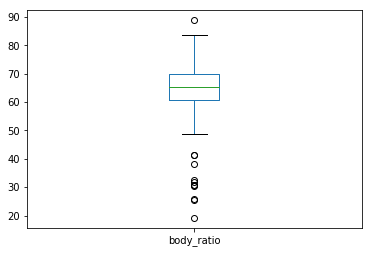

In [43]:
phones.loc[(phones.type == 'Tablet'), ['weight']].plot(kind='box')
phones.loc[(phones.type == 'Tablet'), ['display_size']].plot(kind='box')
phones.loc[(phones.type == 'Tablet'), ['battery']].plot(kind='box')
phones.loc[(phones.type == 'Tablet'), ['approx_price_EUR']].plot(kind='box')
phones.loc[(phones.type == 'Tablet'), ['ppi']].plot(kind='box')
phones.loc[(phones.type == 'Tablet'), ['depth']].plot(kind='box')
phones.loc[(phones.type == 'Tablet'), ['width']].plot(kind='box')
phones.loc[(phones.type == 'Tablet'), ['height']].plot(kind='box')
phones.loc[(phones.type == 'Tablet'), ['body_ratio']].plot(kind='box')

In [44]:
phones[['width']].describe()

,width
count,8629.000000
mean,124.444679
std,33.268595
min,23.000000
25%,105.000000
50%,116.000000
75%,141.500000
max,451.800000


In [45]:
phones[['approx_price_EUR']].describe()

,approx_price_EUR
count,8629.000000
mean,207.556461
std,551.092323
min,10.000000
25%,80.000000
50%,130.000000
75%,208.817052
max,27000.000000


In [46]:
phones[['depth']].describe()

,depth
count,8629.000000
mean,13.676815
std,5.825144
min,0.000000
25%,9.595226
50%,12.500000
75%,16.700000
max,205.200000


In [47]:
phones[['ppi']].describe()

,ppi
count,8629.000000
mean,205.271916
std,87.279288
min,66.000000
25%,143.000000
50%,180.000000
75%,245.000000
max,807.000000


In [0]:
#Removendo outlier de weight
phones = phones.drop(phones.index[1921])
#Removendo outlier de price
phones = phones.drop(phones.index[1798])
#Removendo outlier de depth
phones = phones.drop(phones.index[741])
#Removendo outlier de width
phones = phones.drop(phones.index[6025])

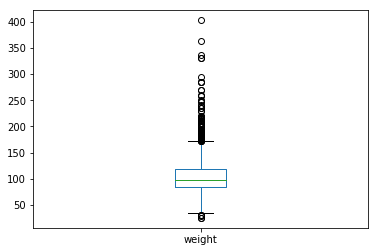

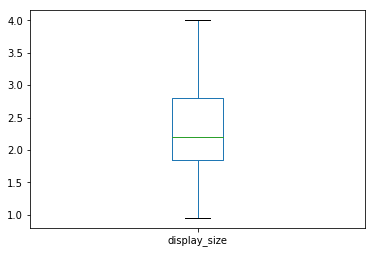

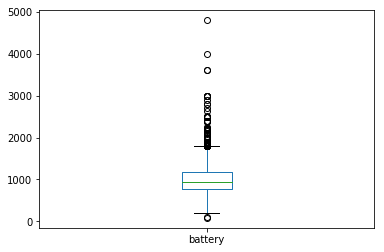

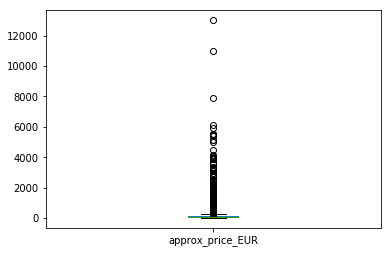

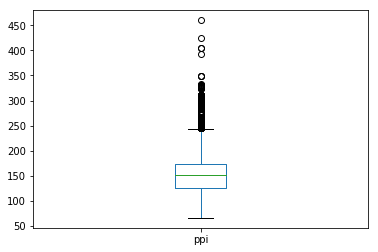

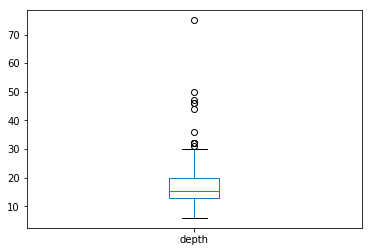

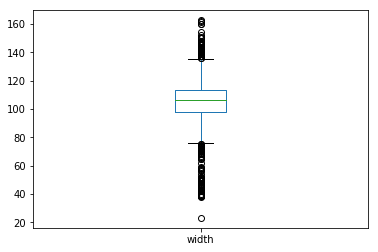

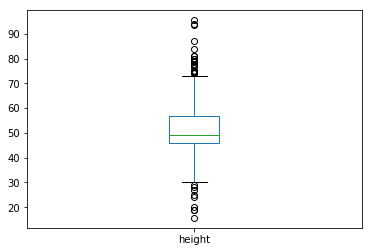

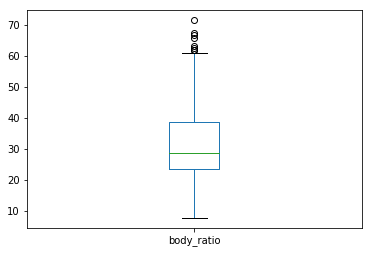

In [49]:
phones.loc[(phones.type == 'Phone'), ['weight']].plot(kind='box')
phones.loc[(phones.type == 'Phone'), ['display_size']].plot(kind='box')
phones.loc[(phones.type == 'Phone'), ['battery']].plot(kind='box')
phones.loc[(phones.type == 'Phone'), ['approx_price_EUR']].plot(kind='box')
phones.loc[(phones.type == 'Phone'), ['ppi']].plot(kind='box')
phones.loc[(phones.type == 'Phone'), ['depth']].plot(kind='box')
phones.loc[(phones.type == 'Phone'), ['width']].plot(kind='box')
phones.loc[(phones.type == 'Phone'), ['height']].plot(kind='box')
phones.loc[(phones.type == 'Phone'), ['body_ratio']].plot(kind='box')

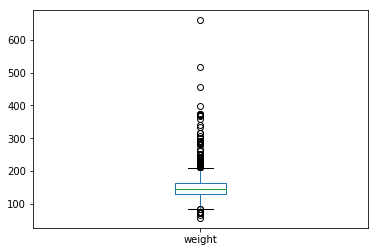

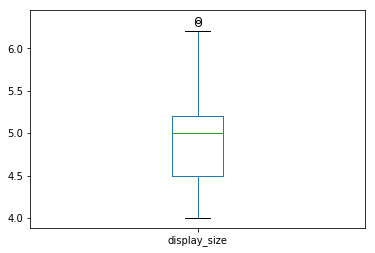

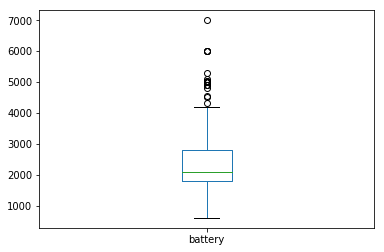

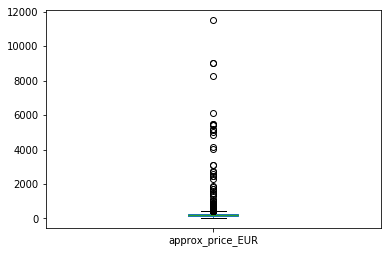

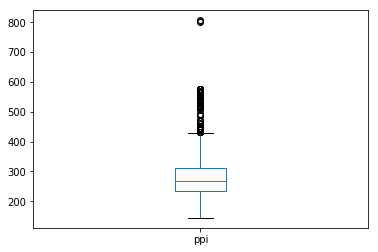

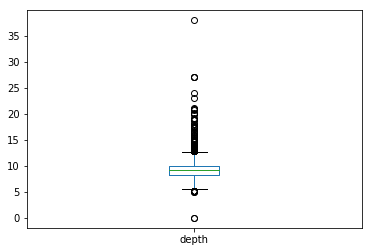

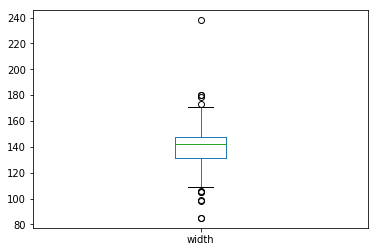

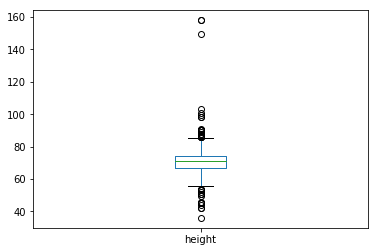

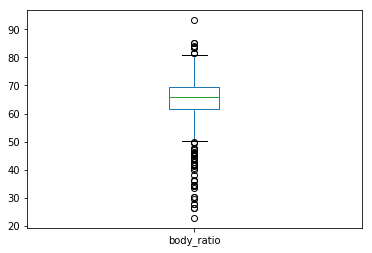

In [50]:
phones.loc[(phones.type == 'Smartphone'), ['weight']].plot(kind='box')
phones.loc[(phones.type == 'Smartphone'), ['display_size']].plot(kind='box')
phones.loc[(phones.type == 'Smartphone'), ['battery']].plot(kind='box')
phones.loc[(phones.type == 'Smartphone'), ['approx_price_EUR']].plot(kind='box')
phones.loc[(phones.type == 'Smartphone'), ['ppi']].plot(kind='box')
phones.loc[(phones.type == 'Smartphone'), ['depth']].plot(kind='box')
phones.loc[(phones.type == 'Smartphone'), ['width']].plot(kind='box')
phones.loc[(phones.type == 'Smartphone'), ['height']].plot(kind='box')
phones.loc[(phones.type == 'Smartphone'), ['body_ratio']].plot(kind='box')

**Correlações**

In [51]:
phones.corr(method='spearman')

,weight,display_size,battery,approx_price_EUR,ppi,depth,width,height,body_ratio
weight,1.000000,0.817686,0.795563,0.530968,0.592177,-0.508333,0.807305,0.835915,0.743412
display_size,0.817686,1.000000,0.902305,0.509811,0.725654,-0.771210,0.880605,0.926047,0.939634
battery,0.795563,0.902305,1.000000,0.477934,0.676838,-0.750736,0.864408,0.886578,0.844770
approx_price_EUR,0.530968,0.509811,0.477934,1.000000,0.510953,-0.361797,0.437985,0.472992,0.534764
ppi,0.592177,0.725654,0.676838,0.510953,1.000000,-0.681370,0.638626,0.656265,0.794166
depth,-0.508333,-0.771210,-0.750736,-0.361797,-0.681370,1.000000,-0.765053,-0.769608,-0.789080
width,0.807305,0.880605,0.864408,0.437985,0.638626,-0.765053,1.000000,0.887348,0.794280
height,0.835915,0.926047,0.886578,0.472992,0.656265,-0.769608,0.887348,1.000000,0.848642
body_ratio,0.743412,0.939634,0.844770,0.534764,0.794166,-0.789080,0.794280,0.848642,1.000000


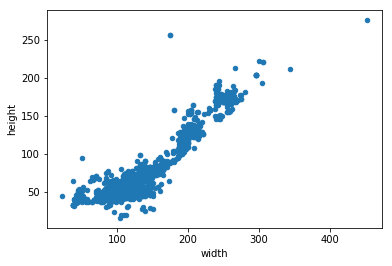

In [52]:
phones.plot.scatter(x='width',y='height')

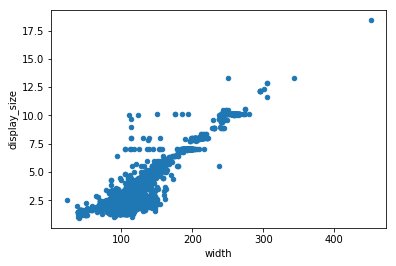

In [53]:
phones.plot.scatter(x='width',y='display_size')

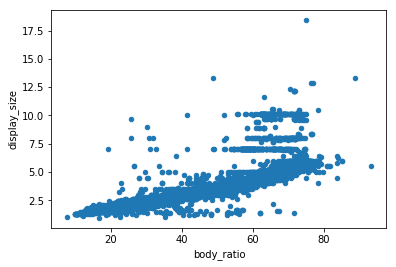

In [54]:
phones.plot.scatter(x='body_ratio',y='display_size')

In [55]:
from numpy import log
phones['width'] = log(phones['width'])
phones['height'] = log(phones['height'])
phones['depth'] = log(phones['depth'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


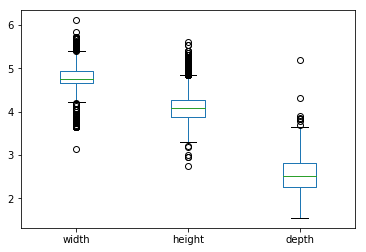

In [0]:
phones[['width', 'height', 'depth']].plot(kind='box')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f873f326320>]],
      dtype=object)

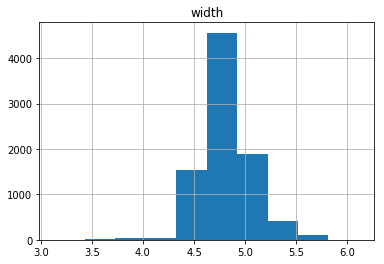

In [0]:
phones[['width']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f873f2ff400>,
      dtype=object)

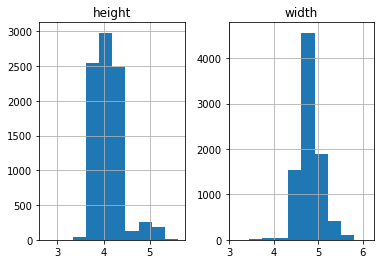

In [0]:
phones[['width', 'height']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8712c7eeb8>]],
      dtype=object)

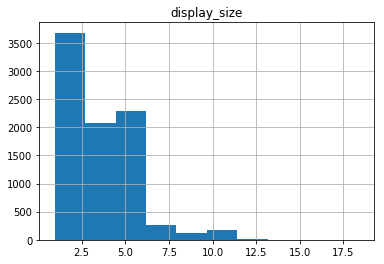

In [0]:
phones[['display_size']].hist()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:5001: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


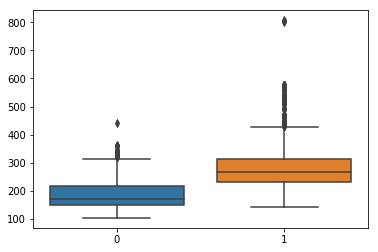

In [0]:
#### TESTES DE HIPÓTESES

#Existe diferença entre tablets e smartphones em relação a pixel por polegada e tamanho de tela?

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

stats.mannwhitneyu(phones[phones['type'] == 'Tablet']['ppi'],phones[phones['type'] == 'Smartphones']['ppi'])

data1 = phones[phones['type'] == 'Tablet']['ppi']
data2 = phones[phones['type'] == 'Smartphone']['ppi']
sns.boxplot(data=[data1, data2])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:5001: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


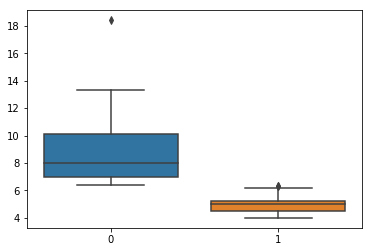

In [0]:
#### TESTES DE HIPÓTESES

stats.mannwhitneyu(phones[phones['type'] == 'Tablet']['ppi'],phones[phones['type'] == 'Smartphones']['ppi'])

data1 = phones[phones['type'] == 'Tablet']['display_size']
data2 = phones[phones['type'] == 'Smartphone']['display_size']
sns.boxplot(data=[data1, data2])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:5001: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


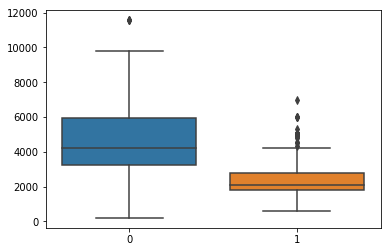

In [0]:
#### TESTES DE HIPÓTESES

#Quanto maior a tela maior a bateria?

stats.mannwhitneyu(phones[phones['type'] == 'Tablet']['ppi'],phones[phones['type'] == 'Smartphones']['ppi'])

data1 = phones[phones['type'] == 'Tablet']['battery']
data2 = phones[phones['type'] == 'Smartphone']['battery']
sns.boxplot(data=[data1, data2])

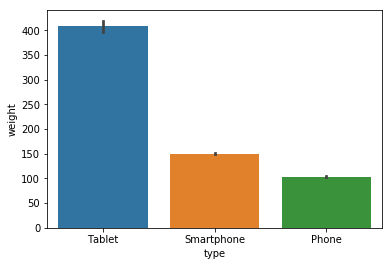

In [0]:
ax = sns.barplot(x="type", y="weight", data=phones)

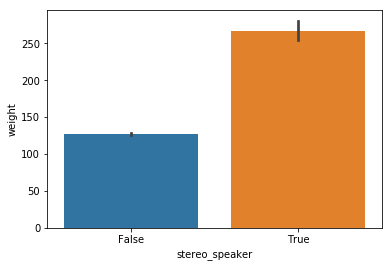

In [0]:
ax = sns.barplot(x="stereo_speaker", y="weight", data=phones)

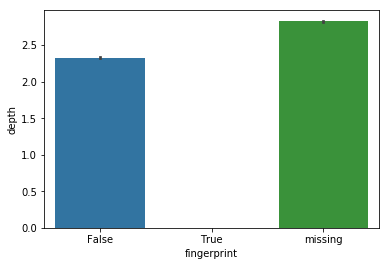

In [0]:
ax = sns.barplot(x="fingerprint", y="depth", data=phones)